## About Dataset

**Dataset:** 

* AirBnb - Singapore market
* Data source: Inside Airbnb website http://insideairbnb.com/get-the-data.html which hosts publicly available data from the Airbnb site.
* Scrape date: Dec 26,2021 
* Number of Recording: 3672 entries








## Audience

* The target audiences that the project toward to are: Tourists who want to visit Singapore

## Question

Airbnb is a booking platform for listing and renting local homes. The idea of this project came from the love of travelling and hope to find insights that might be helpful for future tourists when it comes to looking for an ideal place to stay during a vacation in Singapore.
This project aims to answer the question: Which location is the best to stay among top 5 popular districts in Singapore?

## Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
listing = pd.read_csv('https://raw.githubusercontent.com/Huyenptt113/Airbnb-Singapore/main/listings2.csv')

In [3]:
listing.shape

(3672, 74)

In [4]:
# check column names
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

# A - Data Cleaning

## A1 - Remove unwanted observations

### DROP COLUMNS

In [5]:
#check duplication
listing.duplicated().sum()

0

In [6]:
#DROP UNECESSARY COLUMS
columns = ['listing_url','scrape_id','last_scraped', 'description', 'neighborhood_overview', 'picture_url','host_url','host_name','host_id','host_since', 'amenities',
           'host_location', 'host_about','host_picture_url','host_thumbnail_url','host_verifications','neighbourhood_group_cleansed',
           'neighbourhood', 'bathrooms','availability_30','availability_60','availability_90','availability_365','property_type','host_listings_count',
           'minimum_minimum_nights', 'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
           'calendar_updated','calendar_last_scraped', 'host_total_listings_count','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms','name','license','minimum_nights','maximum_nights','host_has_profile_pic','host_neighbourhood','first_review','last_review']

listing_clean = listing.drop(columns= columns)

In [7]:
# check infor after columns dropping
listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3672 non-null   int64  
 1   host_response_time           3218 non-null   object 
 2   host_response_rate           3218 non-null   object 
 3   host_acceptance_rate         2944 non-null   object 
 4   host_is_superhost            3661 non-null   object 
 5   host_identity_verified       3661 non-null   object 
 6   neighbourhood_cleansed       3672 non-null   object 
 7   latitude                     3672 non-null   float64
 8   longitude                    3672 non-null   float64
 9   room_type                    3672 non-null   object 
 10  accommodates                 3672 non-null   int64  
 11  bathrooms_text               3643 non-null   object 
 12  bedrooms                     3255 non-null   float64
 13  beds              

## A2 - Handle uncorrect Datatype

In [8]:
# Change Data-type 
listing_clean['host_response_rate'] = listing_clean['host_response_rate'].str.replace('%','').astype('float')
listing_clean['host_acceptance_rate'] = listing_clean['host_acceptance_rate'].str.replace('%','').astype('float')

In [9]:
# Change Data-type 
listing_clean['price'] = listing_clean['price'].str.replace(r'[$,]', '').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [10]:
# step 1: takes the "number " out the the strings of the column
listing_clean['bathrooms_text'] = listing_clean['bathrooms_text'].str.replace(r'[a-zA-Z\s]', '')
# replace the '' values to 1:
listing_clean['bathrooms_text'] = listing_clean['bathrooms_text'].str.replace(r'\D$','1')
# turn the type to float
listing_clean['bathrooms_text'] = listing_clean['bathrooms_text'].astype('float')
# change the name to barthrooms
listing_clean.rename(columns = {'bathrooms_text':'bathrooms'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [11]:
#re-check data type after changing type

listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3672 non-null   int64  
 1   host_response_time           3218 non-null   object 
 2   host_response_rate           3218 non-null   float64
 3   host_acceptance_rate         2944 non-null   float64
 4   host_is_superhost            3661 non-null   object 
 5   host_identity_verified       3661 non-null   object 
 6   neighbourhood_cleansed       3672 non-null   object 
 7   latitude                     3672 non-null   float64
 8   longitude                    3672 non-null   float64
 9   room_type                    3672 non-null   object 
 10  accommodates                 3672 non-null   int64  
 11  bathrooms                    3643 non-null   float64
 12  bedrooms                     3255 non-null   float64
 13  beds              

## A3 - Change categorial values

In [12]:
listing_clean.replace("t","Yes",inplace=True)
listing_clean.replace("f","No",inplace=True)

## A4 - Create new columns

In [13]:
listing_clean['total_beds'] = listing_clean['bedrooms']*listing_clean['beds']
listing_clean['price_per_person'] = listing_clean['price']/listing_clean['accommodates']

In [14]:
listing_clean = listing_clean.drop(columns='beds')

In [15]:
listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3672 non-null   int64  
 1   host_response_time           3218 non-null   object 
 2   host_response_rate           3218 non-null   float64
 3   host_acceptance_rate         2944 non-null   float64
 4   host_is_superhost            3661 non-null   object 
 5   host_identity_verified       3661 non-null   object 
 6   neighbourhood_cleansed       3672 non-null   object 
 7   latitude                     3672 non-null   float64
 8   longitude                    3672 non-null   float64
 9   room_type                    3672 non-null   object 
 10  accommodates                 3672 non-null   int64  
 11  bathrooms                    3643 non-null   float64
 12  bedrooms                     3255 non-null   float64
 13  price             

## A5 - Handle Missing Values

In [16]:
# TOP 3 NEIGHBOURHOODS WITH MOST LISTINGS
listing_clean['neighbourhood_cleansed'].value_counts().head(10)

Kallang          405
Geylang          340
Downtown Core    317
Outram           309
Rochor           270
Novena           235
Bedok            186
Bukit Merah      178
River Valley     149
Queenstown       143
Name: neighbourhood_cleansed, dtype: int64

In [17]:
# FILTER OUT 5 CENTRAL LOCATIONS WITH MOST LISTINGS
listing_central =  listing_clean[listing_clean['neighbourhood_cleansed'].isin(['Kallang','Geylang','Downtown Core','Outram','Rochor'])]

In [18]:
#check number of missing value
listing_central.isna().sum()

id                               0
host_response_time             134
host_response_rate             134
host_acceptance_rate           224
host_is_superhost                0
host_identity_verified           0
neighbourhood_cleansed           0
latitude                         0
longitude                        0
room_type                        0
accommodates                     0
bathrooms                       18
bedrooms                       203
price                            0
has_availability                 0
number_of_reviews                0
number_of_reviews_ltm            0
number_of_reviews_l30d           0
review_scores_rating           585
review_scores_accuracy         597
review_scores_cleanliness      597
review_scores_checkin          597
review_scores_communication    596
review_scores_location         596
review_scores_value            596
instant_bookable                 0
reviews_per_month              585
total_beds                     248
price_per_person    

#### host_response_time

In [19]:
listing_central.groupby('host_is_superhost')['host_response_time'].value_counts()

host_is_superhost  host_response_time
No                 within a few hours    407
                   within an hour        301
                   a few days or more    212
                   within a day          174
Yes                within a few hours    259
                   within an hour        117
                   within a day           37
Name: host_response_time, dtype: int64

In [20]:
listing_central.groupby('host_is_superhost')['host_response_time'].describe()

,count,unique,top,freq
host_is_superhost,,,,
No,1094,4,within a few hours,407
Yes,413,3,within a few hours,259


In [21]:
#check listings containing missing values in 'host_response_time' column that has no review
listing_central[(listing_central['host_response_time'].isna()) & (listing_central['number_of_reviews'] !=0)]

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,total_beds,price_per_person
50,1654840,NaN,NaN,NaN,No,No,Rochor,1.30292,103.85800,Private room,...,3.50,3.50,4.50,4.00,4.50,4.00,No,0.04,3.0,30.0
51,1678744,NaN,NaN,NaN,No,Yes,Outram,1.28405,103.84424,Shared room,...,4.65,4.43,4.84,4.79,4.86,4.67,No,1.52,1.0,63.0
52,1678754,NaN,NaN,NaN,No,Yes,Outram,1.28405,103.84424,Hotel room,...,5.00,4.50,5.00,5.00,5.00,5.00,No,0.03,6.0,63.0
53,1678755,NaN,NaN,NaN,No,Yes,Outram,1.28405,103.84424,Hotel room,...,4.72,4.66,4.88,4.85,4.90,4.62,No,0.97,1.0,63.0
72,2547370,NaN,NaN,NaN,No,No,Rochor,1.30154,103.85941,Private room,...,4.50,3.00,5.00,5.00,4.00,4.00,No,0.05,4.0,27.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,41032965,NaN,NaN,NaN,No,Yes,Outram,1.28038,103.84195,Private room,...,5.00,5.00,5.00,5.00,5.00,4.00,Yes,0.04,1.0,208.0
2581,42104603,NaN,NaN,NaN,No,Yes,Outram,1.28152,103.84099,Private room,...,5.00,5.00,5.00,5.00,5.00,5.00,Yes,0.04,1.0,196.0
2735,43174323,NaN,NaN,NaN,No,Yes,Downtown Core,1.27563,103.84849,Private room,...,5.00,5.00,5.00,5.00,5.00,4.50,Yes,0.13,6.0,159.0
2736,43175252,NaN,NaN,NaN,No,Yes,Downtown Core,1.27726,103.84748,Entire home/apt,...,5.00,5.00,5.00,5.00,5.00,5.00,Yes,0.08,1.0,194.5


**Regardless of the 'Super host' status, the majority of the hosts respond to their customers within a few hours. However, it is difficult to determine whether there is a customer has contacted the host yet. Therefore, the missing values of the 'host_response_time' column will be filled with 'Unknown'.**

In [22]:
#fill data
listing_central['host_response_time'] = listing_central[['host_response_time']].fillna('Unknown')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### host_acceptance_rate

In [23]:
#check listings containing missing values in 'host_acceptance_rate' column that has no review
listing_central[(listing_central['host_acceptance_rate'].isna()) & (listing_central['number_of_reviews'] ==0)].shape

(92, 29)

**For listings that have no review, the missing value will be filled by 0—assuming listings having at least one review used to be booked before.**

In [24]:
#fill data
listing_central.loc[listing_central['number_of_reviews'] ==0,'host_acceptance_rate'] = listing_central.loc[listing_central['number_of_reviews'] ==0,'host_acceptance_rate'].fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [25]:
listing_central.isna().sum()

id                               0
host_response_time               0
host_response_rate             134
host_acceptance_rate           132
host_is_superhost                0
host_identity_verified           0
neighbourhood_cleansed           0
latitude                         0
longitude                        0
room_type                        0
accommodates                     0
bathrooms                       18
bedrooms                       203
price                            0
has_availability                 0
number_of_reviews                0
number_of_reviews_ltm            0
number_of_reviews_l30d           0
review_scores_rating           585
review_scores_accuracy         597
review_scores_cleanliness      597
review_scores_checkin          597
review_scores_communication    596
review_scores_location         596
review_scores_value            596
instant_bookable                 0
reviews_per_month              585
total_beds                     248
price_per_person    

In [26]:
listing_central.groupby('host_is_superhost')['host_acceptance_rate'].mean()

host_is_superhost
No     55.793984
Yes    83.703883
Name: host_acceptance_rate, dtype: float64

**The average acceptance rates between superhost host and non-superhost host are different. Assuming listings having at least one review used to be booked before, I filled the missing value in the 'host_acceptance_rate' with the mean response rate in each type of host.**

In [27]:
#fill data
listing_central.loc[listing_central['host_is_superhost'] == 'Yes','host_acceptance_rate'] = listing_central.loc[listing_central['host_is_superhost'] == 'Yes','host_acceptance_rate'].fillna(listing_central.groupby('host_is_superhost')['host_acceptance_rate'].mean()[1])
listing_central.loc[listing_central['host_is_superhost'] == 'No','host_acceptance_rate'] = listing_central.loc[listing_central['host_is_superhost'] == 'No','host_acceptance_rate'].fillna(listing_central.groupby('host_is_superhost')['host_acceptance_rate'].mean()[0])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [28]:
listing_central.isna().sum()

id                               0
host_response_time               0
host_response_rate             134
host_acceptance_rate             0
host_is_superhost                0
host_identity_verified           0
neighbourhood_cleansed           0
latitude                         0
longitude                        0
room_type                        0
accommodates                     0
bathrooms                       18
bedrooms                       203
price                            0
has_availability                 0
number_of_reviews                0
number_of_reviews_ltm            0
number_of_reviews_l30d           0
review_scores_rating           585
review_scores_accuracy         597
review_scores_cleanliness      597
review_scores_checkin          597
review_scores_communication    596
review_scores_location         596
review_scores_value            596
instant_bookable                 0
reviews_per_month              585
total_beds                     248
price_per_person    

### host_response_rate

**I filled the missing value in the 'host_response_rate' the same way as above**

In [29]:
#check listings containing missing values in 'host_response_rate' column that has no review
listing_central[(listing_central['host_response_rate'].isna()) & (listing_central['number_of_reviews'] ==0)].shape

(58, 29)

In [30]:
#fill data
listing_central.loc[listing_central['number_of_reviews'] ==0,'host_response_rate'] = listing_central.loc[listing_central['number_of_reviews'] ==0,'host_response_rate'].fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [31]:
listing_central.groupby('host_is_superhost')['host_response_rate'].mean()

host_is_superhost
No     72.778646
Yes    96.053269
Name: host_response_rate, dtype: float64

In [32]:
#fill data
listing_central.loc[listing_central['host_is_superhost'] == 'Yes','host_response_rate'] = listing_central.loc[listing_central['host_is_superhost'] == 'Yes','host_response_rate'].fillna(listing_central.groupby('host_is_superhost')['host_response_rate'].mean()[1])
listing_central.loc[listing_central['host_is_superhost'] == 'No','host_response_rate'] = listing_central.loc[listing_central['host_is_superhost'] == 'No','host_response_rate'].fillna(listing_central.groupby('host_is_superhost')['host_response_rate'].mean()[0])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### review_scores_rating

In [33]:
#check listings containing missing values in 'review_scores_rating' column that has no review
listing_central[(listing_central['review_scores_rating'].isna()) & (listing_central['number_of_reviews'] ==0)].shape

(585, 29)

**585 missing values in the 'review_scores_rating' column belongs to listings that have no review. So, we cannot fill the missing value**

In [34]:
listing_central.isna().sum()

id                               0
host_response_time               0
host_response_rate               0
host_acceptance_rate             0
host_is_superhost                0
host_identity_verified           0
neighbourhood_cleansed           0
latitude                         0
longitude                        0
room_type                        0
accommodates                     0
bathrooms                       18
bedrooms                       203
price                            0
has_availability                 0
number_of_reviews                0
number_of_reviews_ltm            0
number_of_reviews_l30d           0
review_scores_rating           585
review_scores_accuracy         597
review_scores_cleanliness      597
review_scores_checkin          597
review_scores_communication    596
review_scores_location         596
review_scores_value            596
instant_bookable                 0
reviews_per_month              585
total_beds                     248
price_per_person    

## A5 - Detect outliers

In [35]:
listing_central.describe()

,id,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,price,number_of_reviews,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,total_beds,price_per_person
count,1.641000e+03,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1623.000000,1438.000000,1641.000000,1641.000000,...,1056.000000,1044.000000,1044.000000,1044.000000,1045.000000,1045.000000,1045.000000,1056.000000,1393.000000,1641.000000
mean,3.081331e+07,78.664672,62.852246,1.299882,103.859860,2.987203,1.756007,1.231572,168.508836,14.621572,...,4.512074,4.614224,4.485431,4.751561,4.737856,4.716048,4.500201,0.564422,3.004307,73.035371
std,1.442385e+07,32.616240,35.923697,0.014844,0.015202,2.744032,1.591899,0.619721,275.036865,33.235945,...,0.738040,0.593856,0.645396,0.511513,0.545481,0.484203,0.583510,0.947677,4.626260,185.880143
min,3.559550e+05,0.000000,0.000000,1.273030,103.835090,1.000000,0.000000,1.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,1.500000
25%,1.983120e+07,72.778646,33.000000,1.283380,103.847130,1.000000,1.000000,1.000000,65.000000,0.000000,...,4.360000,4.500000,4.250000,4.730000,4.710000,4.600000,4.330000,0.060000,1.000000,37.250000
50%,3.262196e+07,95.000000,81.000000,1.303640,103.856740,2.000000,1.000000,1.000000,120.000000,1.000000,...,4.730000,4.820000,4.690000,4.910000,4.920000,4.880000,4.640000,0.210000,1.000000,54.000000
75%,4.265477e+07,100.000000,96.000000,1.312260,103.863750,4.000000,2.000000,1.000000,185.000000,11.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.950000,0.750000,4.000000,77.333333
max,5.391043e+07,100.000000,100.000000,1.330360,103.905650,16.000000,21.000000,8.000000,7000.000000,294.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,13.270000,54.000000,7000.000000


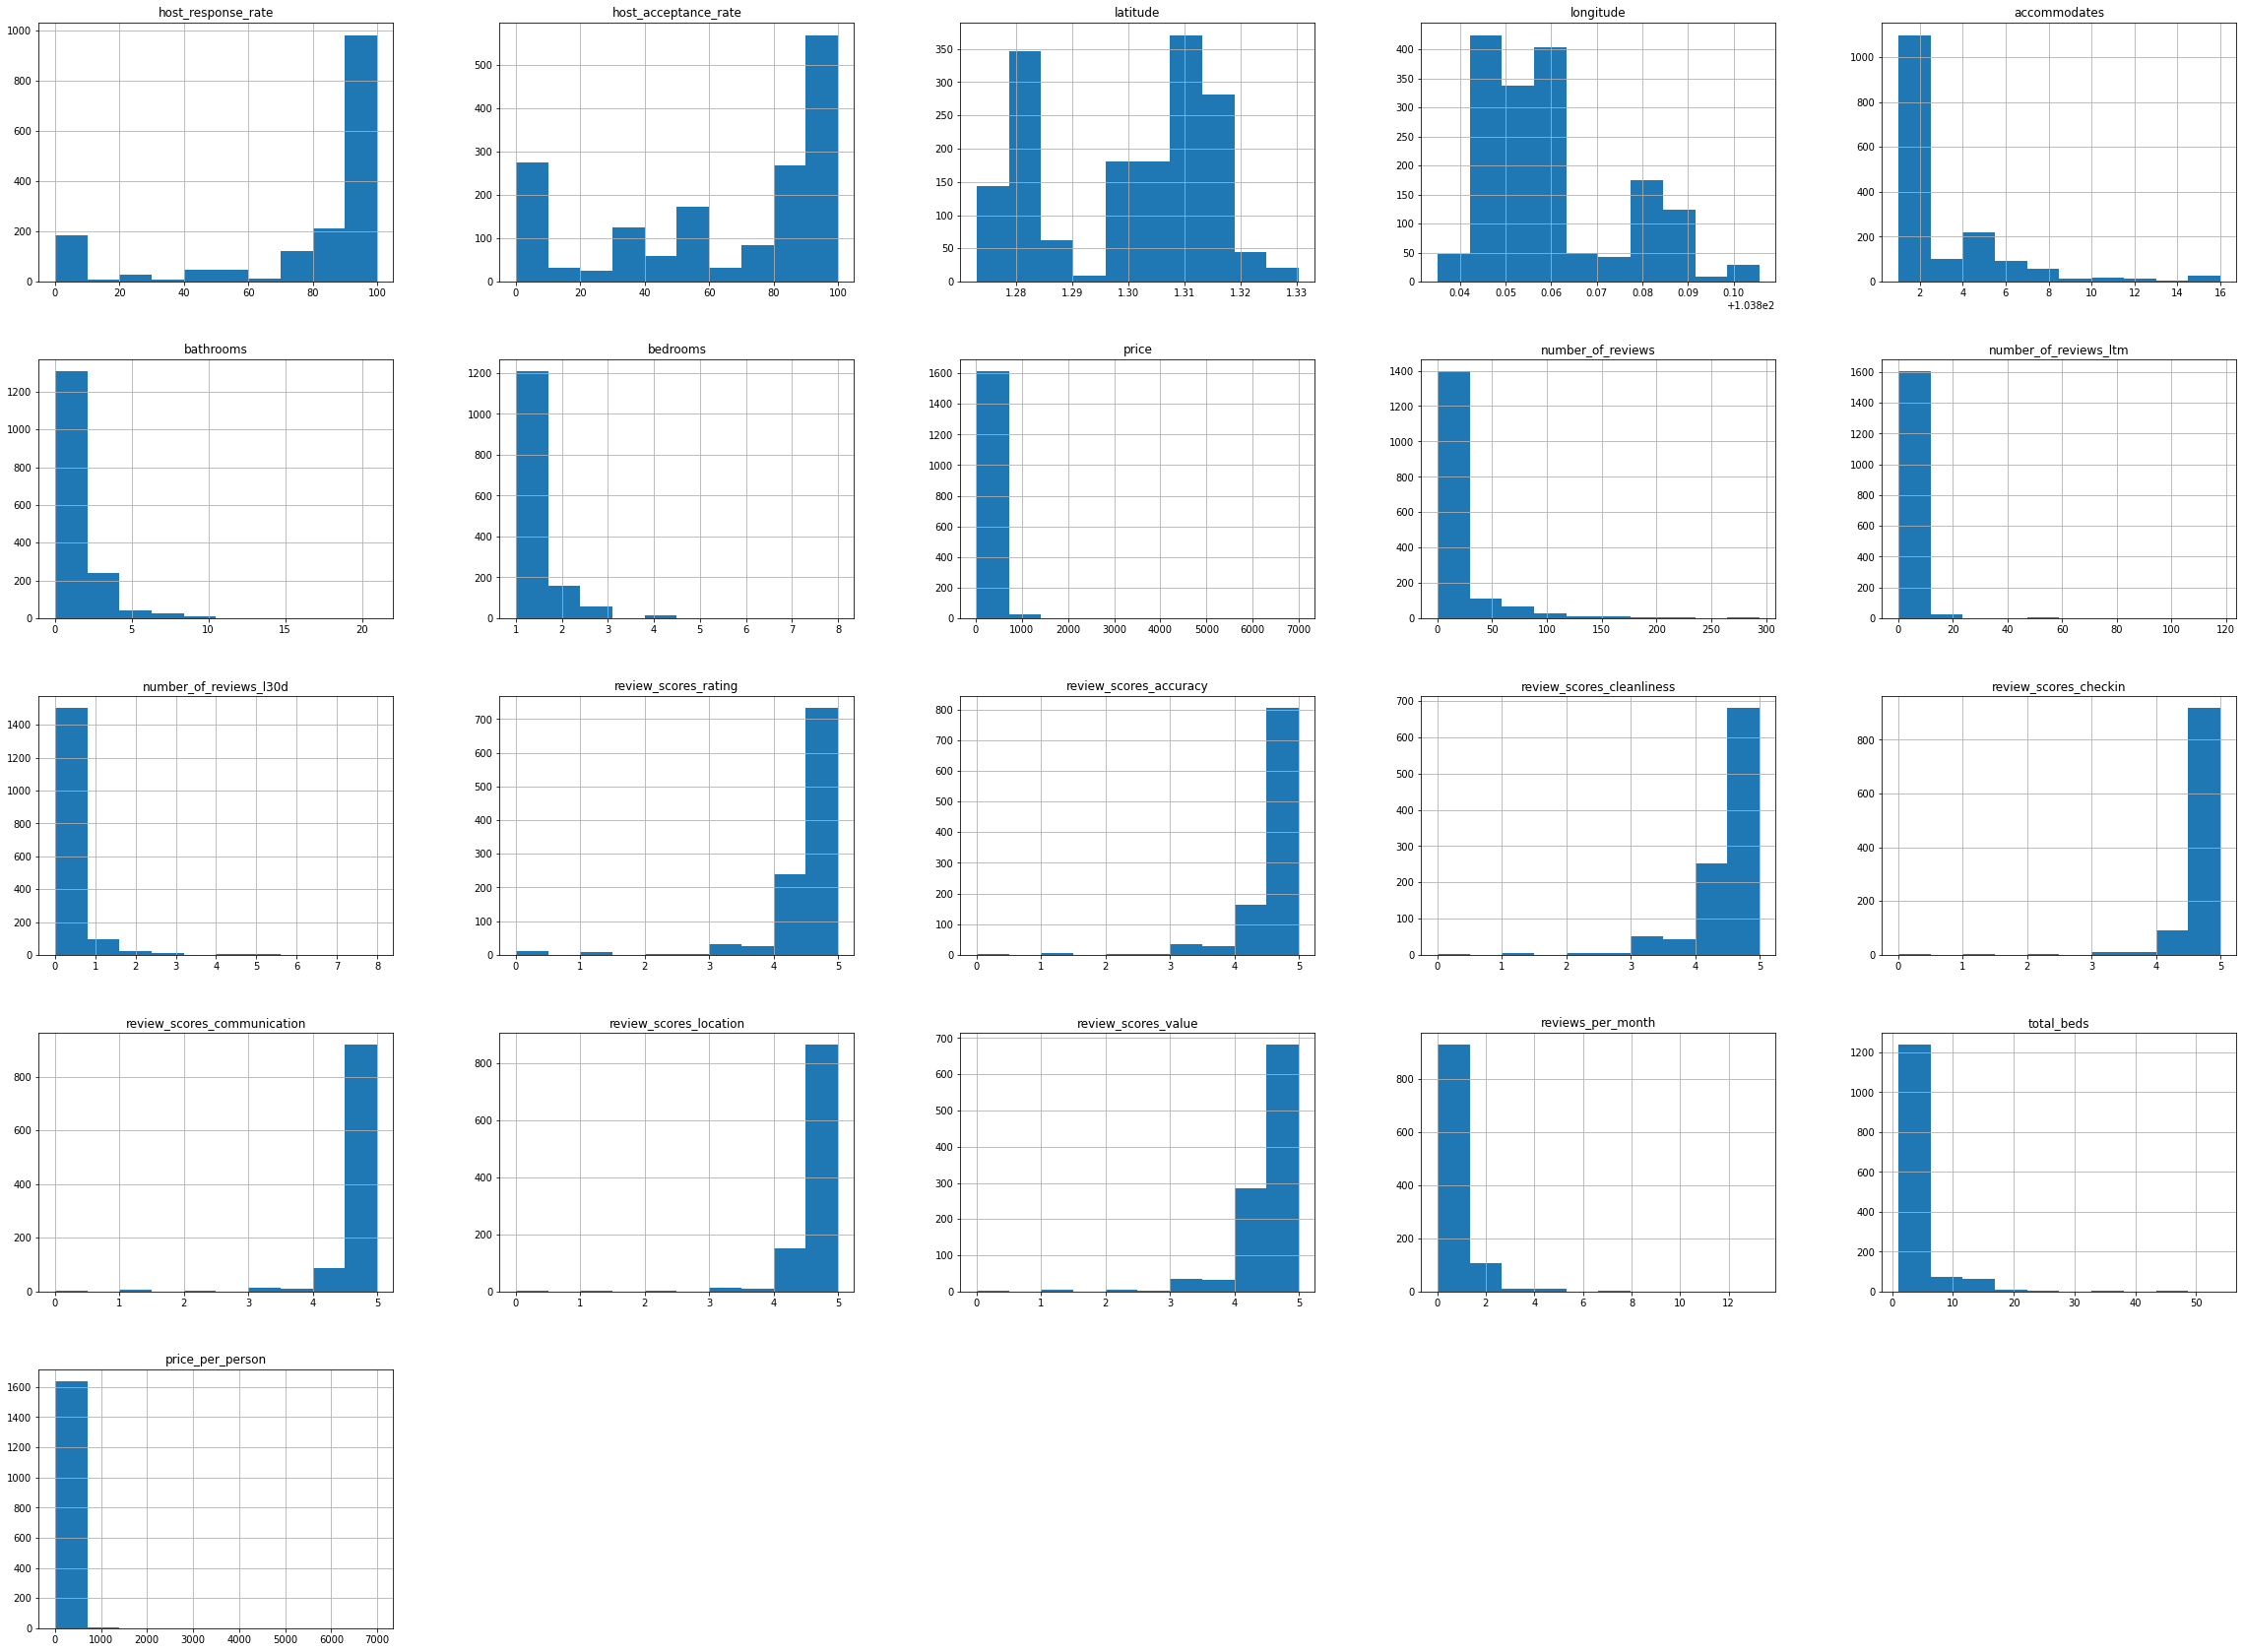

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
listing_central.iloc[:,2:].hist(figsize=(40,30), bins = 10)
plt.show()

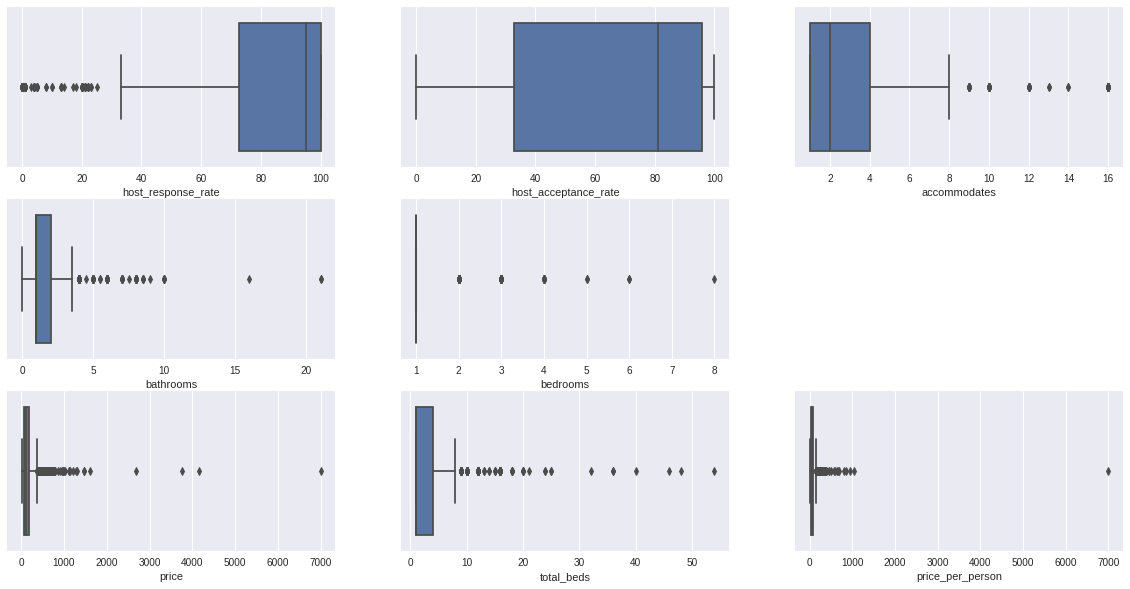

In [37]:
# Outliers - listing.gz / review columns

plt.style.use('seaborn')


plt.figure(figsize=(20, 10))

plt.subplot(331)
rating = listing_central['host_response_rate'].reset_index()
sns.boxplot(data=rating, x = 'host_response_rate')

plt.subplot(332)
accuracy = listing_central['host_acceptance_rate'].reset_index()
sns.boxplot(data=accuracy, x = 'host_acceptance_rate')

plt.subplot(333)
checkin = listing_central['accommodates'].reset_index()
sns.boxplot(data=checkin, x = 'accommodates')

plt.subplot(334)
communication = listing_central['bathrooms'].reset_index()
sns.boxplot(data=communication, x = 'bathrooms')

plt.subplot(335)
location = listing_central['bedrooms'].reset_index()
sns.boxplot(data=location, x = 'bedrooms')


plt.subplot(337)
value = listing_central['price'].reset_index()
sns.boxplot(data=value, x = 'price')

plt.subplot(338)
value = listing_central['total_beds'].reset_index()
sns.boxplot(data=value, x = 'total_beds')

plt.subplot(339)
value = listing_central['price_per_person'].reset_index()
sns.boxplot(data=value, x = 'price_per_person')
plt.show()

In [38]:
listing_central.describe()

,id,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,price,number_of_reviews,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,total_beds,price_per_person
count,1.641000e+03,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1623.000000,1438.000000,1641.000000,1641.000000,...,1056.000000,1044.000000,1044.000000,1044.000000,1045.000000,1045.000000,1045.000000,1056.000000,1393.000000,1641.000000
mean,3.081331e+07,78.664672,62.852246,1.299882,103.859860,2.987203,1.756007,1.231572,168.508836,14.621572,...,4.512074,4.614224,4.485431,4.751561,4.737856,4.716048,4.500201,0.564422,3.004307,73.035371
std,1.442385e+07,32.616240,35.923697,0.014844,0.015202,2.744032,1.591899,0.619721,275.036865,33.235945,...,0.738040,0.593856,0.645396,0.511513,0.545481,0.484203,0.583510,0.947677,4.626260,185.880143
min,3.559550e+05,0.000000,0.000000,1.273030,103.835090,1.000000,0.000000,1.000000,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,1.500000
25%,1.983120e+07,72.778646,33.000000,1.283380,103.847130,1.000000,1.000000,1.000000,65.000000,0.000000,...,4.360000,4.500000,4.250000,4.730000,4.710000,4.600000,4.330000,0.060000,1.000000,37.250000
50%,3.262196e+07,95.000000,81.000000,1.303640,103.856740,2.000000,1.000000,1.000000,120.000000,1.000000,...,4.730000,4.820000,4.690000,4.910000,4.920000,4.880000,4.640000,0.210000,1.000000,54.000000
75%,4.265477e+07,100.000000,96.000000,1.312260,103.863750,4.000000,2.000000,1.000000,185.000000,11.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.950000,0.750000,4.000000,77.333333
max,5.391043e+07,100.000000,100.000000,1.330360,103.905650,16.000000,21.000000,8.000000,7000.000000,294.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,13.270000,54.000000,7000.000000


In [39]:
def detect_outlier(column):
  Q1 = listing_final[column].quantile(0.25)
  Q3 = listing_final[column].quantile(0.75)
  Inter_quantile_range = Q3-Q1
  lower_whisker = Q1 - 1.5*Inter_quantile_range
  upper_whisker = Q3 + 1.5*Inter_quantile_range
  return listing_final[(lower_whisker < listing_final[column]) & (listing_final[column] < upper_whisker)]


In [40]:
listing_final = listing_central.copy()

In [41]:
for column in ['price','accommodates','bathrooms']:
  listing_final = detect_outlier(column)

In [42]:
listing_final.shape

(1270, 29)

# B - Extract data

In [ ]:
from google.colab import files

listing_clean.to_csv('listing_clean.csv', encoding = 'utf-8-sig') 
files.download('listing_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
listing_central.to_csv('listing_central.csv', encoding = 'utf-8-sig') 
files.download('listing_central.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
listing_final.to_csv('listing_final.csv', encoding = 'utf-8-sig') 
files.download('listing_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>